In [3]:
Import Required Libraries

SyntaxError: invalid syntax (<ipython-input-3-1fac80f53159>, line 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "new_files/revenue.xlsx"

In [3]:
revenue = pd.read_excel(file)
revenue

,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,ALABAMA,2007,7069040,689072,4070949,2309019,7196459,3653466,2174210,546077,687816
1,ALASKA,2007,1800616,282270,1052357,465989,1938755,927307,645857,60699,257723
2,ARIZONA,2007,8724434,953861,4204089,3566484,8709531,3977800,2656438,403069,1436673
3,ARKANSAS,2007,4415981,483689,3319030,613262,4779308,2337748,1378576,450454,470562
4,CALIFORNIA,2007,72516936,7200298,42333637,22983001,73225422,34685013,20655194,3467540,10058842
...,...,...,...,...,...,...,...,...,...,...,...
510,VIRGINIA,2016,16259274,1058146,6297587,8903541,16497520,8944614,5164699,643506,1161323
511,WASHINGTON,2016,14964364,1097684,9211201,4655479,15253296,7087365,4904575,577606,2204059
512,WEST_VIRGINIA,2016,3391579,358068,1863062,1170449,3366566,1804235,1127255,236487,181392
513,WISCONSIN,2016,11697466,782610,5986763,4928093,11787535,5760418,3691439,508013,1082849


In [4]:
revenue.isnull().sum()

STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

In [5]:
grad_rate = pd.read_excel("new_files/grad_rate.xlsx")
grad_rate.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,States,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,United States,79.3,80.0,81.4,80.0,83.2,84.3,85.4
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0


In [6]:
grad_rate.shape

(53, 8)

In [7]:
grad_rate_df = grad_rate.rename(columns={"Unmaned: 0":"States", "Unnamed: 1":"2010", "Unnamed: 2":"2011", "Unnamed: 3":"2012", "Unnamed: 4":"2013", "Unnamed: 5":"2014", "Unnamed: 6":"2015", "Unnamed: 7":"2016" })
grad_rate_df.head()


,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016
0,States,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,United States,79.3,80.0,81.4,80.0,83.2,84.3,85.4
2,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
3,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
4,Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0


In [8]:
grad_rate_df_1 = grad_rate_df.drop([0,1])
grad_rate_renamed = grad_rate_df_1.rename(columns={"Unnamed: 0": "States"})
grad_rate_renamed_df = grad_rate_renamed.set_index('States')
grad_rate_renamed_df.head()

,2010,2011,2012,2013,2014,2015,2016
States,,,,,,,
Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
Arizona,78.0,76.0,75.1,76.0,77.4,8.0,78.0
Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
California,76.0,79.0,80.4,79.0,82.0,83.0,83.0


In [9]:
grad_rate_renamed_df.isnull().sum()

2010    3
2011    3
2012    1
2013    3
2014    0
2015    0
2016    0
dtype: int64

In [10]:
grad_rate_renamed_df.loc['Oklahoma'].transform(lambda x: x.fillna(x.mean()))


2010    83.075
2011    83.075
2012    84.800
2013    83.075
2014    82.500
2015    82.000
2016    83.000
Name: Oklahoma, dtype: float64

In [11]:
grad_rate_renamed_df.loc['Idaho'].transform(lambda x: x.fillna(x.mean()))

2010    79.633333
2011    79.633333
2012    79.633333
2013    79.633333
2014    78.900000
2015    80.000000
2016    80.000000
Name: Idaho, dtype: float64

In [12]:
grad_rate_renamed_df.loc['Kentucky'].transform(lambda x: x.fillna(x.mean()))


2010    88.275
2011    88.275
2012    86.100
2013    88.275
2014    88.000
2015    89.000
2016    90.000
Name: Kentucky, dtype: float64

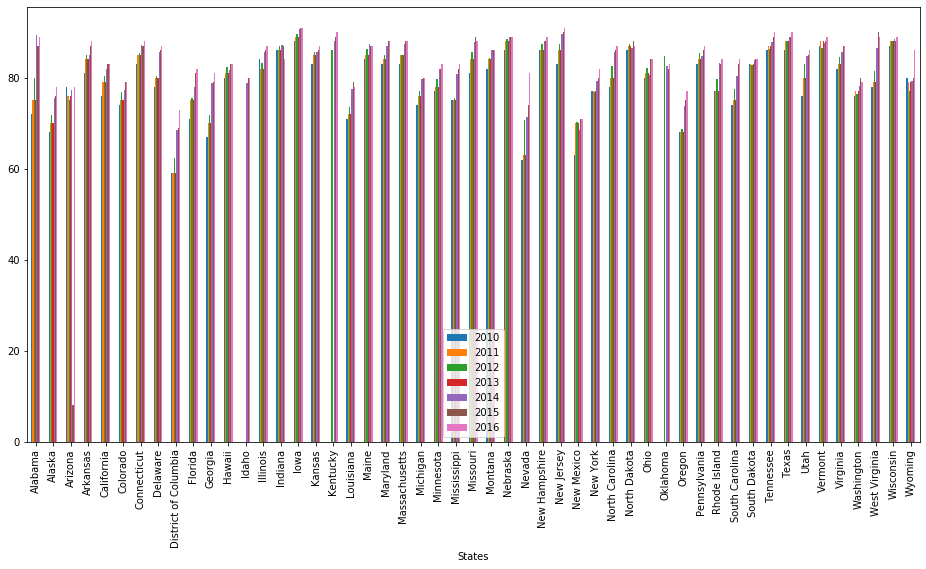

In [13]:
grad_rate_renamed_df.plot(kind='bar', figsize=(16,8))

In [14]:
pupil_spending = pd.read_excel("new_files/per_pupil_spending.xlsx")
pupil_spending.head()

,STATE,2007,Unnamed: 2,2008,Unnamed: 4,2009,Unnamed: 6,2010,Unnamed: 8,2011,...,2012,Unnamed: 12,2013,Unnamed: 14,2014,Unnamed: 16,2015,Unnamed: 18,2016,Unnamed: 20
0,NaN,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,...,PPCS,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1
1,United States,9666.38,5.8,10258.9,6.1,10498.7,2.3,10600.1,1,10608.3,...,10607.7,(Z),10723.5,1.09213,11002.6,2.60285,11391.8,3.53702,11763.2,3.2604
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491


In [15]:
pupil_spending_renamed = pupil_spending.rename(columns={"2007":"2007_PPS", "2008":"2008_PPS", "2009":"2009_PPS",
                                                       "2010":"2010_PPS", "2011":"2011_PPS", "2012":"2012_PPS", "2013":"2013_PPS",
                                                       "2014":"2014_PPS", "2015":"2015_PPS", "2016":"2016_PPS", 
                                                       "Unnamed: 2":"2007 pct_change", "Unnamed: 4":"2008 pct_change",
                                                       "Unnamed: 6":"2009 pct_change","Unnamed: 8":"2010 pct_change",
                                                       "Unnamed: 10":"2011 pct_change", "Unnamed: 12":"2012 pct_change",
                                                       "Unnamed: 14":"2013 pct_change", "Unnamed: 16":"2014 pct_change",
                                                       "Unnamed: 18":"2015 pct_change", "Unnamed: 20":"2016 pct_change"})

pupil_spending_renamed.head()


,STATE,2007,2007 pct_change,2008,2008 pct_change,2009,2009 pct_change,2010,2010 pct_change,2011,...,2012,2012 pct_change,2013,2013 pct_change,2014,2014 pct_change,2015,2015 pct_change,2016,2016 pct_change
0,NaN,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,Percentage change1,PPCS,...,PPCS,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1,PPE,Percentage Change1
1,United States,9666.38,5.8,10258.9,6.1,10498.7,2.3,10600.1,1,10608.3,...,10607.7,(Z),10723.5,1.09213,11002.6,2.60285,11391.8,3.53702,11763.2,3.2604
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491


In [16]:
pupil_spending_df = pupil_spending_renamed.drop([0,1])
pupil_spending_df.head()

,STATE,2007,2007 pct_change,2008,2008 pct_change,2009,2009 pct_change,2010,2010 pct_change,2011,...,2012,2012 pct_change,2013,2013 pct_change,2014,2014 pct_change,2015,2015 pct_change,2016,2016 pct_change
2,ALABAMA,8390.62,9.7,9103.36,8.5,8870,-2.6,8880.74,0.1,8812.7,...,8562.06,-2.84402,8755.23,2.25609,9027.69,3.11199,9127.93,1.11028,9242.68,1.25714
3,ALASKA,12300.2,7.3,14629.7,18.9,15551.8,6.3,15782.5,1.5,16674,...,17390.4,4.29677,18175,4.51169,18415.9,1.32548,20172.5,9.53841,17510,-13.1987
4,ARIZONA,7196.3,11.2,7607.74,5.7,7813.27,2.7,7848.08,0.4,7665.84,...,7558.92,-1.39476,7207.75,-4.64576,7527.77,4.43985,7489.5,-0.508358,7613.01,1.6491
5,ARKANSAS,8283.57,4.5,8541.25,3.1,8711.92,2.0,9143.21,5.0,9353.38,...,9410.62,0.611975,9394.45,-0.171851,9615.73,2.35541,9693.8,0.811872,9845.57,1.56565
6,CALIFORNIA,9152.39,7.9,9863.39,7.8,9657.49,-2.1,9374.71,-2.9,9148.75,...,9182.89,0.373249,9219.51,0.398729,9594.76,4.0702,10466.5,9.08591,11495.4,9.82971


In [17]:
pupil_spending_df.isnull().sum()

STATE              0
2007               0
2007 pct_change    0
2008               0
2008 pct_change    0
2009               0
2009 pct_change    0
2010               0
2010 pct_change    0
2011               0
2011 pct_change    0
2012               0
2012 pct_change    0
2013               0
2013 pct_change    0
2014               0
2014 pct_change    0
2015               0
2015 pct_change    0
2016               0
2016 pct_change    0
dtype: int64

In [19]:
ratio = pd.read_excel("new_files/teacher_student_ratio.xlsx")
ratio.head()

,Unnamed: 0,Unnamed: 1,2007,Unnamed: 3,Unnamed: 4,2008,Unnamed: 6,Unnamed: 7,2009,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,2014,Unnamed: 24,Unnamed: 25,2015,Unnamed: 27,Unnamed: 28,2016,Unnamed: 30
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,...,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,111656,744865,6.67107,95368,745668,7.81885,94058,748889,7.96199,...,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,16593,131029,7.89664,17160,130662,7.61434,17742.6,131661,7.42061,...,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,104670,1087447,10.3893,105548,1087817,10.3064,100320,1077831,10.7439,...,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,70331,479016,6.81088,71270,478965,6.72043,74311,480559,6.46686,...,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [28]:
ratio_df = ratio.drop(['Unnamed: 1', 2007, 'Unnamed: 3', 'Unnamed: 4', 2008, 'Unnamed: 6', 'Unnamed: 7', 2009, 'Unnamed: 9','Unnamed: 10', 2010, 'Unnamed: 12'],axis=1)
ratio_df.head()


,Unnamed: 0,Unnamed: 13,2011,Unnamed: 15,Unnamed: 16,2012,Unnamed: 18,Unnamed: 19,2013,Unnamed: 21,Unnamed: 22,2014,Unnamed: 24,Unnamed: 25,2015,Unnamed: 27,Unnamed: 28,2016,Unnamed: 30
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [31]:
ratio_renamed_df = ratio_df.rename(columns={"Unnamed: 0":"State", "Unnamed: 13":"2011_staff", 2011:"2011_enrollment", 
                                     "Unnamed: 15":"2011_ratio", "Unnamed: 16":"2012_staff", 2012:"2012_enrollment", 
                                      "Unnamed: 18":"2012_ratio", "Unnamed: 19":"2013_staff", 2013:"2013_enrollment",
                                     "Unnamed: 21":"2013_ratio", "Unnamed: 22":"2014_staff", 2014:"2014_enrollment",
                                     "Unnamed: 24":"2014_ratio",  "Unnamed: 25":"2015_staff", 2015:"2015_enrollment",
                                     "Unnamed: 27":"2015_ratio", "Unnamed: 28":"2016_staff", 2016:"2016_enrollment",
                                     "Unnamed: 30":"2016_ratio"}) 
                                     
ratio_renamed_df.head()                                 
                                     

,State,2011_staff,2011_enrollment,2011_ratio,2012_staff,2012_enrollment,2012_ratio,2013_staff,2013_enrollment,2013_ratio,2014_staff,2014_enrollment,2014_ratio,2015_staff,2015_enrollment,2015_ratio,2016_staff,2016_enrollment,2016_ratio
0,STATE,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio,Staff,Enrollment,Ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103


In [34]:
ratio_cleaned_df = ratio_renamed_df.drop([0])
ratio_cleaned_df.head()

,State,2011_staff,2011_enrollment,2011_ratio,2012_staff,2012_enrollment,2012_ratio,2013_staff,2013_enrollment,2013_ratio,2014_staff,2014_enrollment,2014_ratio,2015_staff,2015_enrollment,2015_ratio,2016_staff,2016_enrollment,2016_ratio
1,ALABAMA,47722.7,744621,15.6031,51877.2,744637,14.3538,47161.8,746204,15.8222,42736.8,744164,17.4127,40766.2,743789,18.2452,42532.9,744930,17.5142
2,ALASKA,8087.87,131167,16.2177,7682.18,131489,17.1161,7898.26,130944,16.5788,7759.08,131176,16.9061,7832.15,132477,16.9145,7824.91,132737,16.9634
3,ARIZONA,50800.2,1080319,21.2661,48866.4,1089384,22.2931,48358.7,1102445,22.7972,48124.5,1111695,23.1004,47943.6,1109040,23.1322,48220.1,1123137,23.2919
4,ARKANSAS,33983,483114,14.2164,34131.4,486157,14.2437,34933,489979,14.0262,35430,490917,13.856,35803.9,492132,13.7452,35730.3,493447,13.8103
5,CALIFORNIA,268689,6287834,23.4019,266255,6299451,23.6595,259506,6312623,24.3256,267685,6312161,23.5806,263475,6305347,23.9315,271287,6309138,23.2563


In [35]:
ratio_cleaned_df.isnull().sum()

State              0
2011_staff         0
2011_enrollment    0
2011_ratio         0
2012_staff         0
2012_enrollment    0
2012_ratio         0
2013_staff         0
2013_enrollment    0
2013_ratio         0
2014_staff         0
2014_enrollment    0
2014_ratio         0
2015_staff         0
2015_enrollment    0
2015_ratio         0
2016_staff         0
2016_enrollment    0
2016_ratio         0
dtype: int64

In [42]:
teacher_salaries = pd.read_excel("new_files/teacher_salaries_1.xlsx").round(0)
teacher_salaries.drop([0])

,State,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Alabama,43389.0,46604.0,46879.0,47571.0,47803.0,48003.0,47949.0,48720,48611,48518,50391,50568
2,Alaska,54679.0,56758.0,58395.0,60732.0,62918.0,62425.0,65468.0,65891,66755,67443,68769,69682
3,Arizona,44700.0,45772.0,46358.0,46952.0,46637.0,45193.0,45264.0,45335,47456,47218,47255,48723
4,Arkansas,45590.0,45238.0,45738.0,46045.0,45998.0,46314.0,46631.0,47319,47823,48218,48304,50544
5,California,63640.0,65808.0,66995.0,67932.0,67871.0,69755.0,69435.0,71396,74090,77179,79128,80680
6,Colorado,45831.0,47493.0,48485.0,49181.0,49228.0,49049.0,49844.0,49615,44421,51233,51810,52701
7,Connecticut,62107.0,63722.0,65830.0,68096.0,69165.0,69465.0,69397.0,70583,71709,72013,73147,74517
8,Delaware,54680.0,55994.0,56667.0,57080.0,57934.0,58800.0,59679.0,59305,59707,59960,61286,61795
9,District of Columbia,59000.0,60628.0,62557.0,64548.0,66601.0,68720.0,70906.0,73162,75490,73991,75692,76486
10,Florida,45308.0,46930.0,46921.0,46708.0,45732.0,46504.0,46598.0,47780,48992,46612,47267,48168
